In [2]:
!git clone https://github.com/AnggitaGayatri/COBA-COBA.git


Cloning into 'COBA-COBA'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
import pandas as pd
import numpy as np
import math
import random

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import scipy.stats as stats
%matplotlib inline
from itertools import cycle

# Konfigurasi Visualisasi
pio.templates.default = "plotly_dark"
%config InlineBackend.figure_format = 'retina'

#preprocessing
from sklearn.preprocessing import MinMaxScaler

# membangun model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.callbacks import EarlyStopping


# Untuk evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

# ACES

In [ ]:
aces_data = pd.read_excel("dataset_lq45_intraday.xlsx", sheet_name="ACES.JK")

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=aces_data['Datetime'],
    y=aces_data['Close'],
    mode='lines',
    name='Close Price',
    line=dict(color='orange', width=2)
))

fig.update_layout(
    title='Whole period of timeframe of Bank BRI close price 2014-2024',
    xaxis_title='Date',
    yaxis_title='Close Stock',
    plot_bgcolor='black',
    font=dict(size=15, color='white')
)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
aces =aces_data[['Close']]

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
aces=scaler.fit_transform(np.array(aces).reshape(-1,1))
print(aces.shape)

(3175, 1)


In [ ]:
training_size=int(len(aces)*0.80)
test_size=len(aces)-training_size
train_data,test_data=aces[0:training_size,:],aces[training_size:len(aces),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2540, 1)
test_data:  (635, 1)


### convert an array of values into a dataset matrix

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 35
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2504, 35)
y_train:  (2504,)
X_test:  (599, 35)
y_test (599,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (2504, 35, 1)
X_test:  (599, 35, 1)


### Model Building

In [ ]:
model = Sequential()
model.add(Input(shape=(35, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, verbose=1,
                    )

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0514 - val_loss: 7.5726e-04
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 7.4015e-04 - val_loss: 7.6040e-04
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.2962e-04 - val_loss: 7.0421e-04
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.3228e-04 - val_loss: 6.8730e-04
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.3779e-04 - val_loss: 6.3303e-04
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.1956e-04 - val_loss: 6.6700e-04
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.9690e-04 - val_loss: 5.7391e-04
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 5.5921e-04 - val_loss: 5.2933e-04
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.5638e-04 - val_loss: 5.0449e-04
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 5.2597e-04 - val_loss: 5.2498e-04
Epoch 11/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.

### Training and Validation Loss

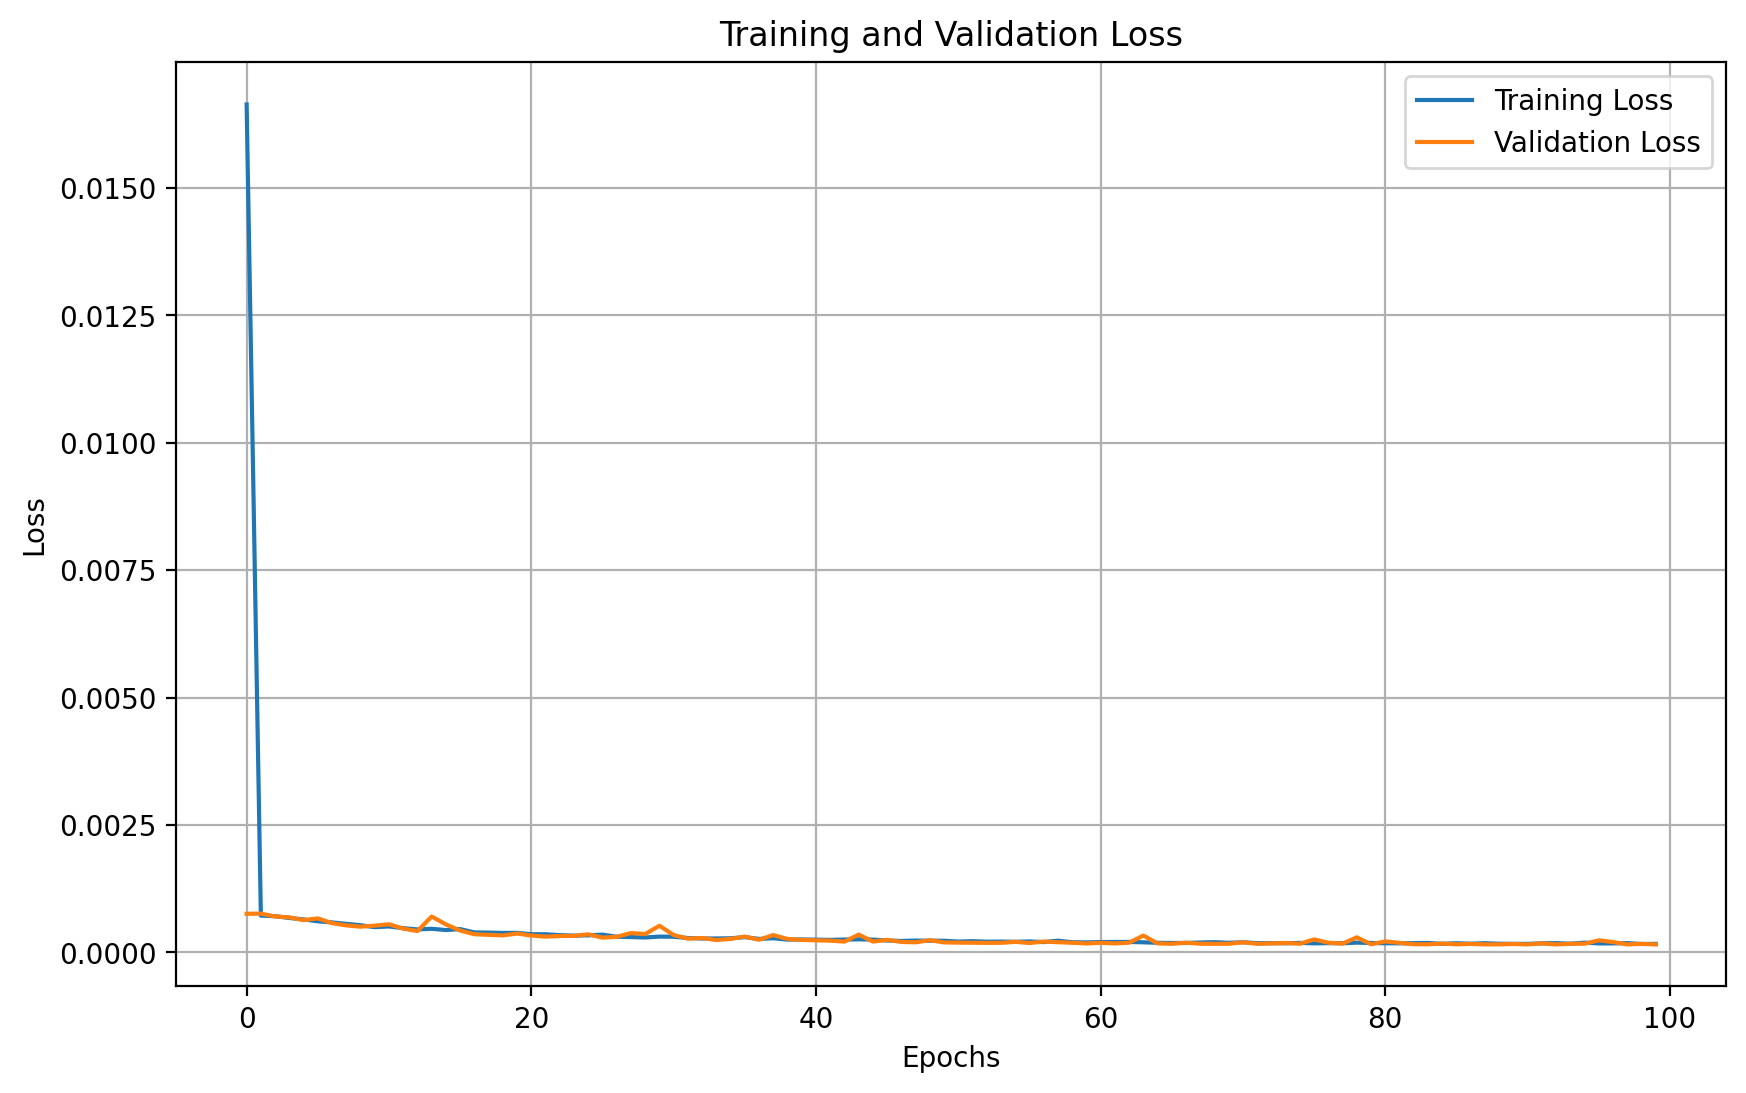

In [ ]:
import matplotlib.pyplot as plt

# Mengambil nilai loss dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


plotly

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

# Membuat plot menggunakan plotly.graph_objects
fig = go.Figure()

# Plot training loss
fig.add_trace(go.Scatter(
    x=list(epochs),
    y=loss,
    mode='lines',
    name='Training Loss',
    line=dict(color='red')
))

# Plot validation loss
fig.add_trace(go.Scatter(
    x=list(epochs),
    y=val_loss,
    mode='lines',
    name='Validation Loss',
    line=dict(color='blue')
))

# Update layout
fig.update_layout(
    title='Training and Validation Loss',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    plot_bgcolor='black',
    font=dict(size=15, color='white')
)

fig.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


((2504, 1), (599, 1))

In [ ]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Model Evaluation

In [ ]:
# Fungsi untuk menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MAPE untuk data train dan test
train_mape = mean_absolute_percentage_error(original_ytrain, train_predict)
test_mape = mean_absolute_percentage_error(original_ytest, test_predict)

In [ ]:
# Evaluasi metrik
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain, train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain, train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain, train_predict))
print("Train data MAPE: {:.2f}%".format(train_mape))
print("\n-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest, test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest, test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest, test_predict))
print("Test data MAPE: {:.2f}%".format(test_mape))


Train data RMSE:  7.520808565671939
Train data MSE:  56.56256148148441
Train data MAE:  5.0669448901289185
Train data MAPE: 0.74%

-------------------------------------------------------------------------------------
Test data RMSE:  7.439280802450376
Test data MSE:  55.3428988577067
Test data MAE:  5.139945257884232
Test data MAPE: 0.62%


### Visualisasi

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(aces)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(aces)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(aces)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': aces_data['Datetime'],
                       'original_close': aces_data['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='black', font_size=15, font_color='white', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3175, 1)
Test predicted data:  (3175, 1)


In [ ]:
# simpan hasil prediksi

# # Simpan DataFrame ke dalam file Excel
# plotdf.to_excel("predicted_stock_prices.xlsx", index=False)

# print("Data berhasil disimpan ke dalam file 'predicted_stock_prices.xlsx'")


# SAVE MODEL

In [ ]:
# Simpan model ke dalam format HDF5
model.save("aces_model.h5")
print("Model berhasil disimpan dalam format HDF5.")

Model berhasil disimpan dalam format HDF5.


# predict next days

## Load Model

In [ ]:
from keras.models import load_model
model = load_model('aces_model.h5')

## Import Library

In [ ]:
import firebase_admin
from firebase_admin import credentials, firestore
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

## Inisialisasi Firestore

In [ ]:
# Initialize Firestore
cred = credentials.Certificate("investpro-14cab-firebase-adminsdk-j0asa-231a52d66e.json")
firebase_admin.initialize_app(cred)
db = firestore.client()

ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [ ]:
import numpy as np
def get_last_35_close_prices(stock_symbol):
    docs = db.collection("stocks_data").document(stock_symbol).collection("daily_data").stream()

    close_prices = []
    for doc in docs:
        data = doc.to_dict()
        if 'Close' in data:
            close_prices.append((doc.id, data['Close']))

    close_prices.sort(key=lambda x: x[0])
    last_42_close_prices = [price for _, price in close_prices[-42:]]

    if not last_42_close_prices:
        print("Tidak ada data harga penutupan yang tersedia untuk simbol saham tersebut.")
        return np.array([])

    return np.array(last_42_close_prices).reshape(-1, 1)

close_prices = get_last_35_close_prices("ACES.JK")

if close_prices.size == 0:
    print("Tidak ada data harga penutupan yang tersedia untuk simbol saham tersebut.")
else:
    print("Harga penutupan terakhir:", close_prices)


sliding window menggunakan 42 data terakhir untuk prediksi 7 jam selanjutnya

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def prepare_input(data, window_size=35):
    return data.reshape(1, window_size, 1)


scaler = MinMaxScaler(feature_range=(0, 1))


close_prices_scaled = scaler.fit_transform(close_prices)


X_input = prepare_input(close_prices_scaled[:35])

# List untuk menyimpan hasil prediksi
predicted_prices = []

# Prediksi harga untuk jam 9, 10, 11, 13, 14, 15, 16
for hour in [9, 10, 11, 13, 14, 15, 16]:
    # Prediksi harga untuk jam berikutnya
    predicted_price_scaled = model.predict(X_input)  # Lakukan prediksi menggunakan model

    # Transformasi hasil prediksi kembali ke harga asli
    predicted_price = scaler.inverse_transform(predicted_price_scaled)

    # Simpan hasil prediksi
    predicted_prices.append(predicted_price[0][0])

    # Update input menggunakan sliding window (ambil hasil prediksi dan geser satu langkah)
    X_input = np.append(X_input[:, 1:, :], predicted_price_scaled.reshape(1, 1, 1), axis=1)

# Tampilkan hasil prediksi
for hour, price in zip([9, 10, 11, 13, 14, 15, 16], predicted_prices):
    print(f"Prediksi harga penutupan pada jam {hour}:00 adalah {price}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediksi harga penutupan pada jam 9:00 adalah 826.7626342773438
Prediksi harga penutupan pada jam 10:00 adalah 826.8300170898438
Prediksi harga penutupan pada jam 11:00 adalah 827.030517578125
Prediksi harga penutupan pada jam 13:00 adalah 827.2963256835938
Prediksi harga penutupan pada jam 14:00 adalah 827.5901489257812
Prediksi harga penutupan pada jam 15:00 adalah 827.8914794921875
Prediksi harga penutupan pada jam 16:00 adalah 828.1905517578125


In [ ]:
import plotly.graph_objects as go

hours = [9, 10, 11, None, 13, 14, 15]


predicted_prices = [predicted_prices[0], predicted_prices[1], predicted_prices[2], None, predicted_prices[3], predicted_prices[4], predicted_prices[5]]


fig = go.Figure()


fig.add_trace(go.Scatter(
    x=hours,
    y=predicted_prices,
    mode='lines+markers',
    name='Prediksi Harga',
    line=dict(color='cyan')
))


fig.update_layout(
    title='Prediksi Harga Penutupan Intraday',
    xaxis_title='Jam',
    yaxis_title='Harga Penutupan',
    template='plotly_dark'
)


fig.show()


menerapakan model untuk prediksi pada data testing

In [ ]:
model = load_model("aces_model.h5")


scaler = MinMaxScaler(feature_range=(0, 1))


your_data = pd.read_excel("dataset_lq45_intraday.xlsx", sheet_name="ACES.JK")
dates = your_data['Datetime']
close_prices = your_data['Close'].values .reshape(-1, 1)

train_size = int(len(close_prices) * 0.8)
train_data, test_data = close_prices[:train_size], close_prices[train_size:]


train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)


time_step = 35
predictions = []


for i in range(time_step, len(test_data_scaled)):

    input_sequence = test_data_scaled[i - time_step:i]


    pred_scaled = model.predict(input_sequence.reshape(1, time_step, 1))
    pred_original = scaler.inverse_transform(pred_scaled)


    predictions.append(pred_original[0][0])


actual_prices = test_data[time_step:]
prediction_dates = dates[train_size + time_step:]




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

In [ ]:
# Plot results using Plotly with dark theme
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=prediction_dates,
    y=actual_prices.flatten(),
    mode='lines',
    name='Actual Prices',
    line=dict(color='cyan')
))
fig.add_trace(go.Scatter(
    x=prediction_dates,
    y=predictions,
    mode='lines',
    name='Predicted Prices',
    line=dict(color='orange')
))

# Customize layout for dark theme
fig.update_layout(
    title='Stock Price Prediction vs Actual Prices',
    xaxis_title='Time',
    yaxis_title='Price',
    template='plotly_dark',
)

fig.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def prepare_input(data, window_size=35):
    return data.reshape(1, window_size, 1)


scaler = MinMaxScaler(feature_range=(0, 1))


close_prices_scaled = scaler.fit_transform(close_prices)


X_input = prepare_input(close_prices_scaled[-35:])

predicted_price_scaled = model.predict(X_input)


predicted_price = scaler.inverse_transform(predicted_price_scaled)


print(f"Prediksi harga penutupan pada satu jam berikutnya adalah: {predicted_price[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediksi harga penutupan pada satu jam berikutnya adalah: 831.3557739257812


MENAMBAHKAN DATA HASIL PREDIKSI PADA SEBELUMNYA SEBAGAI INPUT BARU UNTUK PREDIKSI BERIKUTNYA

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


def prepare_input(data, window_size=35):
    return data.reshape(1, window_size, 1)


scaler = MinMaxScaler(feature_range=(0, 1))

close_prices_scaled = scaler.fit_transform(close_prices)

X_input = prepare_input(close_prices_scaled[-35:])


predicted_prices = []

for hour in [9, 10, 11, 13, 14, 15, 16]:
    predicted_price_scaled = model.predict(X_input)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)

    predicted_prices.append(predicted_price[0][0])
    X_input = np.append(X_input[:, 1:, :], predicted_price_scaled.reshape(1, 1, 1), axis=1)

for hour, price in zip([9, 10, 11, 13, 14, 15, 16], predicted_prices):
    print(f"Prediksi harga penutupan pada jam {hour}:00 adalah {price}")


# PREDIKSI MENGGUNAKAN SEMUA DATA FIRESTORE

In [ ]:
import firebase_admin
from firebase_admin import credentials, firestore
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Initialize Firestore
cred = credentials.Certificate("investpro-14cab-firebase-adminsdk-j0asa-231a52d66e.json")
firebase_admin.initialize_app(cred)
db = firestore.client()

In [ ]:
def get_all_data(ticker):
    # Referensi ke sub-collection `daily_data`
    collection_ref = db.collection("stocks").document(ticker).collection("daily_data")

    # Ambil semua data dan urutkan berdasarkan timestamp (ascending)
    query = collection_ref.order_by("timestamp", direction=firestore.Query.ASCENDING)
    results = query.stream()

    # Simpan data dalam list
    all_data = []
    for doc in results:
        all_data.append(doc.to_dict())

    return all_data


In [ ]:
def filter_data_by_hours(data):
    # Jam yang diinginkan
    target_hours = ["09:00:00", "10:00:00", "11:00:00", "13:00:00", "14:00:00", "15:00:00", "16:00:00"]

    # Filter data
    filtered_data = [entry for entry in data if entry["timestamp"].split(" ")[1] in target_hours]

    return filtered_data


In [ ]:
def predict_with_rolling_window(data, model, window_size=35):
    import numpy as np

    # Simpan hasil prediksi
    predictions = []

    for i in range(window_size, len(data)):
        # Ambil window data
        window_data = data[i-window_size:i]

        # Format data untuk model
        input_data = np.array([entry["close"] for entry in window_data]).reshape(1, -1, 1)  # (batch_size, time_steps, features)

        # Prediksi
        prediction = model.predict(input_data)

        # Simpan hasil prediksi dengan timestamp
        predictions.append({
            "timestamp": data[i]["timestamp"],
            "predicted_close": prediction[0][0]
        })

    return predictions


In [ ]:
# Muat model
model = load_model("aces_model.h5")



In [ ]:
# Langkah-langkah utama
ticker = "ACES.JK"  # Contoh saham
all_data = get_all_data(ticker)  # Ambil semua data
filtered_data = filter_data_by_hours(all_data)  # Filter berdasarkan jam

# Prediksi dengan rolling window
predictions = predict_with_rolling_window(filtered_data, model, window_size=35)

# Cetak hasil prediksi
for pred in predictions:
    print(f"Timestamp: {pred['timestamp']}, Predicted Close: {pred['predicted_close']}")

In [ ]:
print("All Data:", all_data)


All Data: []
